In [79]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rd
%matplotlib inline

#Set initial parameters
cells = 50
beta = 0.392
gamma = 0.0742

In [73]:
#Function to initialize universe matrices with number starting infected, number starting empty spaces
def initialize(cells, infected, empty):
    state = np.zeros((cells,cells),float)
    #Place infected randomly
    for n in range(infected):
        i = np.random.randint(0,cells)
        j = np.random.randint(0,cells)
        state[i,j] = 2
    #Place empty spaces randomly
    for y in range(empty):
        i = np.random.randint(0,cells)
        j = np.random.randint(0,cells)
        #Make sure empty spaces aren't placed where the infected were placed
        while state[i,j] == 2:
            i = np.random.randint(0,cells)
            j = np.random.randint(0,cells)
        state[i,j] = 1
    return state

In [74]:
#Function for CA Ruleset
def update(x, inf_rate, rec_rate):
    rows, cols = x.shape
    xnew = np.zeros(x.shape)
    for i, j in np.ndindex(x.shape):
        #Create variables to hold values of each neighbor
        left = x[i, (j-1)%cols]
        right = x[i,(j+1)%cols]
        up = x[(i-1)%rows, j]
        down = x[(i+1)%rows, j]
        upl = x[(i-1)%rows, (j-1)%cols]
        upr = x[(i-1)%rows, (j+1)%cols]
        downl = x[(i+1)%rows, (j-1)%cols]
        downr = x[(i+1)%rows, (j+1)%cols]
        #Counter for number of infected neighbors
        num_inf = 0
        #Test if neighbors infected
        if x[i,j] == 0: #0 is susceptible
            if left == 2:
                num_inf +=1
            if right == 2:
                num_inf +=1
            if up == 2:
                num_inf +=1
            if down == 2:
                num_inf +=1
            if upl == 2:
                num_inf +=1
            if upr == 2:
                num_inf +=1
            if downl == 2:
                num_inf +=1
            if downr == 2:
                num_inf +=1
            #Calculate probability of infection based on infection rate and # infected neighbors
            prob_inf = 1-((1-inf_rate)**(num_inf))
            #If infection rate higher than random number, change to infected
            if prob_inf >= rd.random():
                xnew[i,j] = 2
        elif x[i,j] == 1: #1 is empty space
            xnew[i,j] = 1 #Keep empty spaces
        elif x[i,j] == 2: #2 is infected
            if rec_rate >= rd.random(): 
                xnew[i,j] = 3 #If recovery rate hugher than random number, change to recovered
        elif x[i,j] == 3: #3 is recovered
            xnew[i,j] = 3 #Keep recovered
    return xnew

In [75]:
#Function for moving individual cells into public domain
def move_out(state, cells, U1, U2, U3, U4):
    #Public Domain matrix: empty spaces until populated
    statenew = np.ones(state.shape)
    U1new = np.copy(U1)
    U2new = np.copy(U2)
    U3new = np.copy(U3)
    U4new = np.copy(U4)
    
    #Randomized integers for universe indices
    a = np.random.randint(0,cells)
    b = np.random.randint(0,cells)
    c = np.random.randint(0,cells)
    d = np.random.randint(0,cells)
    e = np.random.randint(0,cells)
    f = np.random.randint(0,cells)
    g = np.random.randint(0,cells)
    h = np.random.randint(0,cells)

    #Make sure to retrieve anything but 1(empty space) from universes
    while U1[a,b] == 1:
        a = np.random.randint(0,cells)
        b = np.random.randint(0,cells)
    while U2[c,d] == 1:
        c = np.random.randint(0,cells)
        d = np.random.randint(0,cells)
    while U3[e,f] == 1:
        e = np.random.randint(0,cells)
        f = np.random.randint(0,cells)
    while U4[g,h] == 1:
        g = np.random.randint(0,cells)
        h = np.random.randint(0,cells)   
    
    #Randomized integers for public domain indices
    aa = np.random.randint(0,5)
    bb = np.random.randint(0,5)
    cc = np.random.randint(0,5)
    dd = np.random.randint(0,5)
    ee = np.random.randint(0,5)
    ff = np.random.randint(0,5)
    gg = np.random.randint(0,5)
    hh = np.random.randint(0,5)

    #Make sure to retrieve only 1(empty space) from public domain
    while state[aa,bb] != 1:
        aa = np.random.randint(0,5)
        bb = np.random.randint(0,5)
    while state[cc,dd] != 1:
        cc = np.random.randint(0,5)
        dd = np.random.randint(0,5)
    while state[ee,ff] != 1:
        ee = np.random.randint(0,5)
        ff = np.random.randint(0,5)
    while state[gg,hh] != 1:
        gg = np.random.randint(0,5)
        hh = np.random.randint(0,5)

    #Populate public space with individuals from universes
    statenew[aa,bb] = U1[a,b]
    statenew[cc,dd] = U2[c,d]
    statenew[ee,ff] = U3[e,f]
    statenew[gg,hh] = U4[g,h]

    #Store indices for move back
    i_m = np.array([a, b, c, d, e, f, g, h, aa, bb, cc, dd, ee, ff, gg, hh])
    
    #Replace individuals who left universes with an empty space
    U1new[a,b] = 1
    U2new[c,d] = 1
    U3new[e,f] = 1
    U4new[g,h] = 1
    return statenew, U1new, U2new, U3new, U4new, i_m

In [76]:
#Function for moving individuals back to their universes from public domain
def move_back(state, cells, U1, U2, U3, U4, i_m):
    #Create new, empty space public domain matrix
    statenew = np.ones(state.shape)
    U1new = np.copy(U1)
    U2new = np.copy(U2)
    U3new = np.copy(U3)
    U4new = np.copy(U4)
    
    #Unpack index values
    a = i_m[0]
    b = i_m[1]
    c = i_m[2]
    d = i_m[3]
    e = i_m[4]
    f = i_m[5]
    g = i_m[6]
    h = i_m[7]
    aa = i_m[8]
    bb = i_m[9]
    cc = i_m[10]
    dd = i_m[11]
    ee = i_m[12]
    ff = i_m[13]
    gg = i_m[14]
    hh = i_m[15]
    
    #Repopulate universes with individuals following interaction in public domain
    U1new[a,b] = state[aa,bb]
    U2new[c,d] = state[cc,dd]
    U3new[e,f] = state[ee,ff]
    U4new[g,h] = state[gg,hh]
    
    return statenew, U1new, U2new, U3new, U4new

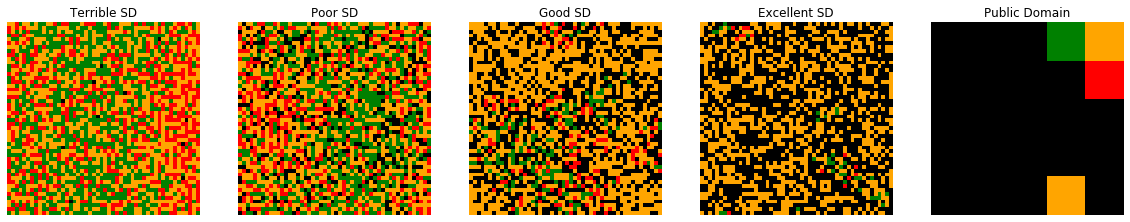

In [78]:
#Set colors for each matrix value
colors = ['Orange', 'Black', 'Red', 'Green'] #[Susceptible, Empty Space, Infected, Recovered]
ca = np.array([0,1,2,3])

#Set colormap to chosen colors
cmap = mpl.colors.ListedColormap(colors)
#Arrange boundaries to make sure chosen color set to discrete value
norm = mpl.colors.BoundaryNorm(np.arange(len(ca)+1)-0.5, len(ca))

#Initialize universes with #infected, #empty spaces for starting conditions
universe1 = initialize(cells,5,10)   # Terrible SD
universe2 = initialize(cells,5,400)  # Poor SD
universe3 = initialize(cells,5,1200) # Good SD
universe4 = initialize(cells,5,2000) # Excellent SD

#Initialize Public Domain matrix
universe5 = np.ones((5,5))
#Initialize Index matrix
i_m = np.zeros((1,16))

from IPython.display import clear_output
#Number of Generations
n = 30
#Counter for iteration of move in, move out of public domain
t = 0
for i in range(n):
    fig = plt.figure(figsize = (20,20))
    
    ax1 = fig.add_subplot(1,5,1)
    ax1.imshow(universe1, interpolation='none', cmap=cmap, norm=norm)
    plt.axis('off')
    plt.title('Terrible SD')
    
    ax2 = fig.add_subplot(1,5,2)
    ax2.imshow(universe2, interpolation='none', cmap=cmap, norm=norm)
    plt.axis('off')
    plt.title('Poor SD')
    
    ax3 = fig.add_subplot(1,5,3)
    ax3.imshow(universe3, interpolation='none', cmap=cmap, norm=norm)
    plt.axis('off')
    plt.title('Good SD')
    
    ax4 = fig.add_subplot(1,5,4)
    ax4.imshow(universe4, interpolation='none', cmap=cmap, norm=norm)
    plt.axis('off')
    plt.title('Excellent SD')

    ax5 = fig.add_subplot(1,5,5)
    ax5.imshow(universe5, interpolation='none', cmap=cmap, norm=norm)
    plt.axis('off')
    plt.title('Public Domain')
    
    plt.show()
    #Update to next time step (Generation)
    while True:
        if t == 0: #Move into public domain + update(Interact)
            universe5, universe1, universe2, universe3, universe4, i_m = move_out(universe5, cells, universe1, universe2, universe3, universe4)
            universe1 = update(universe1, beta, gamma)
            universe2 = update(universe2, beta, gamma)
            universe3 = update(universe3, beta, gamma)
            universe4 = update(universe4, beta, gamma)
            universe5 = update(universe5, beta, gamma)
            t +=1
            break
        if t == 1: #Move out of public domain + update(interact)
            universe5, universe1, universe2, universe3, universe4 = move_back(universe5, cells, universe1, universe2, universe3, universe4, i_m)
            universe1 = update(universe1, beta, gamma)
            universe2 = update(universe2, beta, gamma)
            universe3 = update(universe3, beta, gamma)
            universe4 = update(universe4, beta, gamma)
            universe5 = update(universe5, beta, gamma)
            t = 0
            break
    #Clears output for plotting next generation
    clear_output(wait=True)